In [1]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../tigress/cj1223/gmdata/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,23,24,25,35]+list(range(37,60)))

In [2]:
# os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

In [3]:
# case='vlarge__all_8t_z0.0_None'
case='vlarge_all_all_t_z0.0_None'

data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))
meta=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/meta.pkl'), 'rb'))

In [4]:
xs=[]
ys=[]
ls=[]
for d in data:
    xs.append(d.x.numpy()[0,:]) #final only
    ys.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
xs=np.vstack(xs)
# xs[:,40]=np.log10(xs[:,40])
ys=np.vstack(ys)
ls=np.array(ls)
splits=np.cumsum(ls)

In [5]:
# case='vlarge__all_8t_z0.0_None'

In [6]:
meta['long'], meta['fails']

(119, 0)

In [7]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')

In [8]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

100%|████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 258.33it/s]


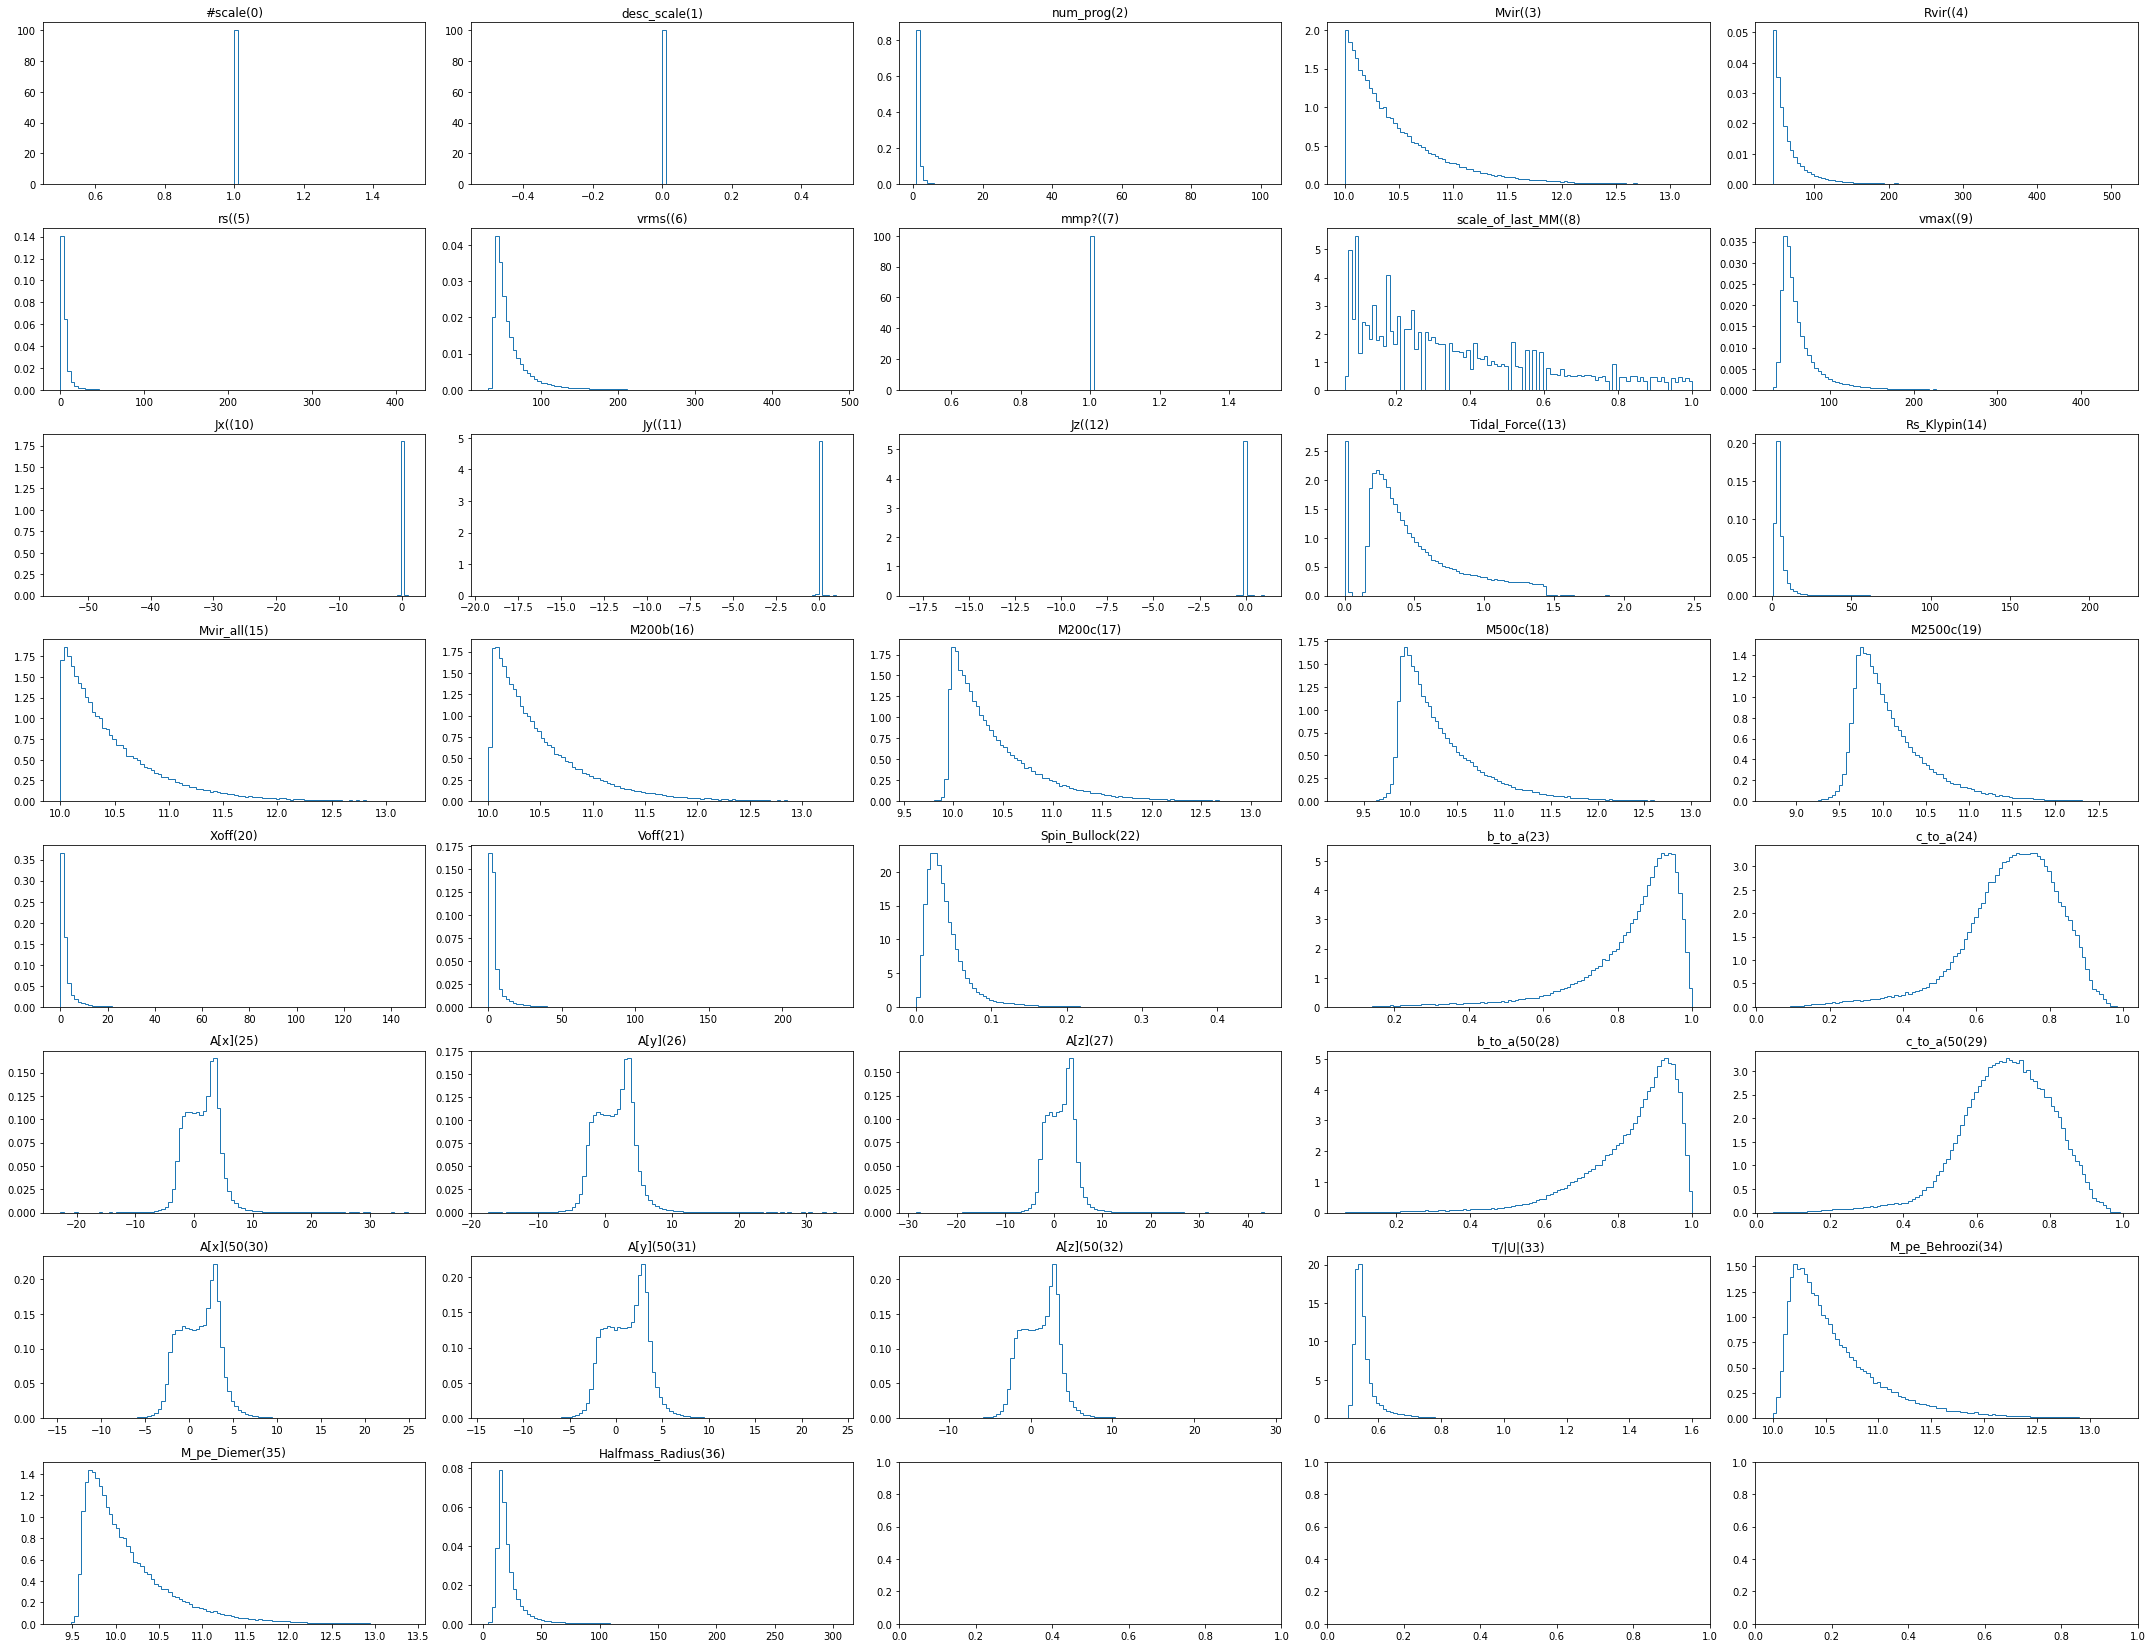

In [9]:

fig,ax=plt.subplots(nrows = 8, ncols = 5, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

## Investigate

In [10]:
# targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)
targets=[8, 11, 15, 16, 17, 19, 21, 23]
targets = np.arange(41)

In [11]:
pdc.iloc[:,0]

0                                # 0 halo_index (long) 
1                           # 1 birthhaloid (long long)
2                            # 2 roothaloid (long long)
3                                          # 3 redshift
4                               # 4 sat_type 0= central
5               # 5 mhalo total halo mass [1.0E09 Msun]
6               # 6 m_strip stripped mass [1.0E09 Msun]
7                   # 7 rhalo halo virial radius [Mpc)]
8                  # 8 mstar stellar mass [1.0E09 Msun]
9       # 9 mbulge stellar mass of bulge [1.0E09 Msun] 
10    # 10 mstar_merge stars entering via mergers] [...
11        # 11 v_disk rotation velocity of disk [km/s] 
12    # 12 sigma_bulge velocity dispersion of bulge ...
13    # 13 r_disk exponential scale radius of stars+...
14      # 14 r_bulge 3D effective radius of bulge [kpc]
15       # 15 mcold cold gas mass in disk [1.0E09 Msun]
16                 # 16 mHI cold gas mass [1.0E09 Msun]
17                 # 17 mH2 cold gas mass [1.0E0

In [12]:
colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})')        

In [13]:
yt = pd.DataFrame(np.log10(ys), columns=cols_t)
mask=np.array(yt.min()==-np.inf)
mi = np.array(yt.replace(-np.inf, 0).min())[mask]

infcols = yt.columns[mask]

for i, col in enumerate(infcols):
    yt[col] = yt[col].replace(-np.inf, mi[i])

/tmp/ipykernel_30653/1530446983.py:1: RuntimeWarning: divide by zero encountered in log10
  yt = pd.DataFrame(np.log10(ys), columns=cols_t)
/tmp/ipykernel_30653/1530446983.py:1: RuntimeWarning: invalid value encountered in log10
  yt = pd.DataFrame(np.log10(ys), columns=cols_t)


In [14]:
yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)

yt2 = yt2.replace(-np.inf, np.nan)
idx_throw  = np.array(yt2[yt2.isna().any(axis=1)].index)
idx_keep  = np.array(yt2.dropna().index)

/tmp/ipykernel_30653/2248393095.py:1: RuntimeWarning: divide by zero encountered in log10
  yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)
/tmp/ipykernel_30653/2248393095.py:1: RuntimeWarning: invalid value encountered in log10
  yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)


In [15]:
yt.describe()

,halo_index (long) (0),birthhaloid (long long)(1),roothaloid (long long)(2),redshift(3),sat_type 0= central(4),mhalo total halo mass [1.0E09 Msun](5),m_strip stripped mass [1.0E09 Msun](6),rhalo halo virial radius [Mpc)](7),mstar stellar mass [1.0E09 Msun](8),mbulge stellar mass of bulge [1.0E09 Msun] (9),...,tmajmerge time since last major merger [Gyr](31),mu_merge mass ratio of last merger [](32),t_sat time since galaxy became a satellite in this halo [Gyr](33),r_fric distance from halo center [Mpc](34),x_position x coordinate [cMpc](35),y_position y coordinate [cMpc](36),z_position z coordinate [cMpc](37),vx x component of velocity [km/s](38),vy y component of velocity [km/s](39),vz z component of velocity [km/s](40)
count,108808.000000,108808.000000,108808.000000,108808.0,108808.0,108808.000000,108808.000000,108808.000000,108808.000000,108808.000000,...,108808.000000,108808.000000,0.0,108808.0,108808.000000,108808.000000,108808.000000,54294.000000,55017.000000,55117.000000
mean,6.210277,9.052097,9.052097,0.0,0.0,1.669901,1.669901,-1.022680,-1.191787,-1.991085,...,1.514217,-0.734452,NaN,0.0,1.574413,1.600982,1.620958,2.042827,1.982968,2.026923
std,0.512947,0.001008,0.001008,0.0,0.0,0.472139,0.472139,0.157380,0.933894,0.992554,...,0.583017,0.197577,NaN,0.0,0.451512,0.438487,0.428949,0.489446,0.505975,0.492288
min,2.559907,9.050355,9.050355,0.0,0.0,1.169154,1.169154,-1.189595,-7.036896,-7.361721,...,-2.011132,-0.999987,NaN,0.0,-2.871804,-3.038454,-3.626726,-2.000000,-2.000000,-1.698970
25%,5.928908,9.051198,9.051198,0.0,0.0,1.327316,1.327316,-1.136875,-1.859691,-2.684712,...,1.042241,-0.900635,NaN,0.0,1.395468,1.432574,1.490931,1.818094,1.742725,1.794209
50%,6.246858,9.052077,9.052077,0.0,0.0,1.527470,1.527470,-1.070157,-1.428627,-2.215523,...,2.055768,-0.760500,NaN,0.0,1.699724,1.732351,1.753351,2.138871,2.078130,2.121396
75%,6.587251,9.052935,9.052935,0.0,0.0,1.865424,1.865424,-0.957507,-0.761736,-1.523949,...,2.055768,-0.598137,NaN,0.0,1.909003,1.910896,1.911152,2.372783,2.329378,2.362143
max,7.164299,9.053863,9.053863,0.0,0.0,4.432478,4.432478,-0.101821,2.559394,2.523947,...,2.055768,-0.000139,NaN,0.0,2.044214,2.044210,2.044206,3.148405,3.137984,3.134145


In [16]:
ys_floor=np.array(yt)

 54%|████████████████████████████████████▍                               | 22/41 [00:00<00:00, 217.78it/s]/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
100%|████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 242.33it/s]


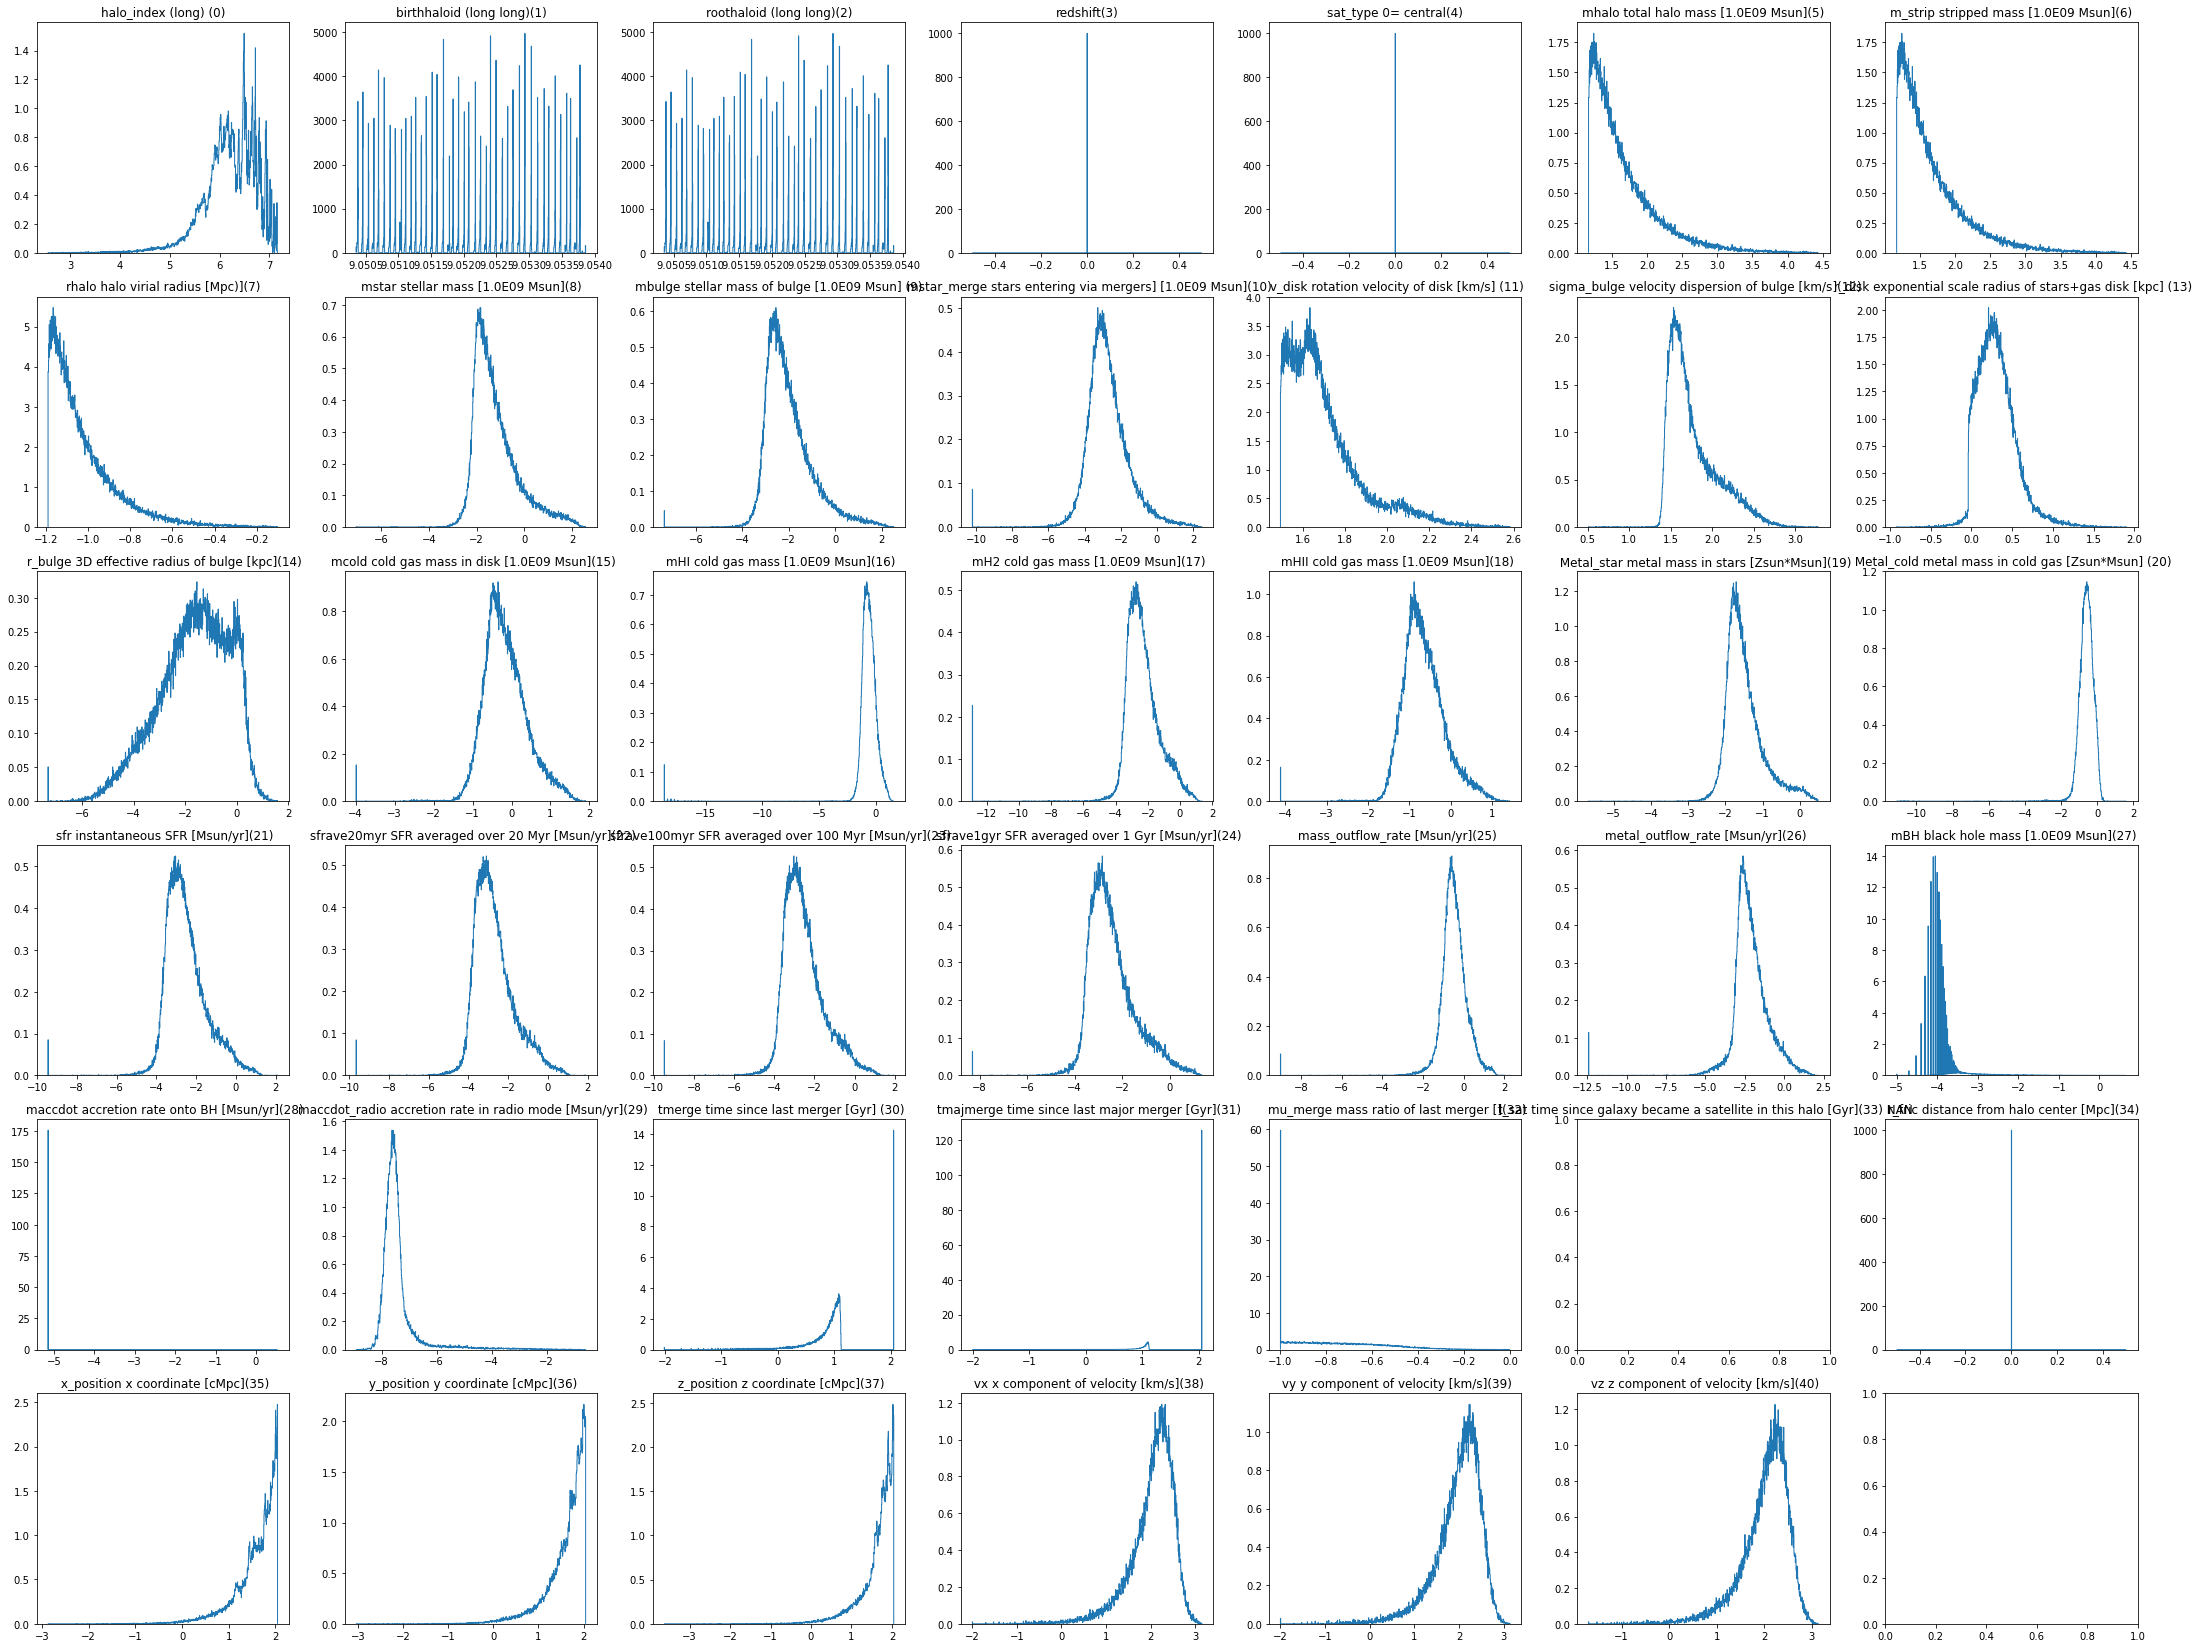

In [17]:
fig,ax=plt.subplots(nrows=6,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_t))):
    try:
        if i in [19,20]:
            ax[i].hist(np.log10(10**ys_floor[:,i]/10**ys_floor[:,8]), bins=1000, density=1, histtype='step');

            ax[i].set(title=cols_t[i])
        else:
            ax[i].hist(ys_floor[:,i], bins=1000, density=1, histtype='step');
            ax[i].set(title=cols_t[i])
    except:
        ax[i].set(title=cols_t[i]+' NAN')
# ax[8].hist(np.log10(10**ys_floor[:,5]/10**ys_floor[:,0]), bins=1000, density=1, histtype='step');

fig.tight_layout()

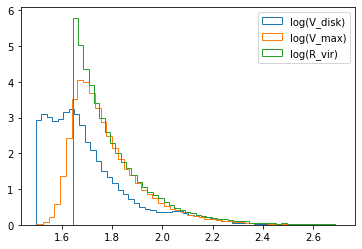

In [18]:
plt.hist(ys_floor[:,11], bins=50, density=1, histtype='step',  label='log(V_disk)');
plt.hist(np.log10(xs[:,9]), bins=50, density=1, histtype='step', label='log(V_max)');
plt.hist(np.log10(xs[:,4]), bins=50, density=1, histtype='step', label='log(R_vir)');
# plt.hist(np.log10(xs[:,14]), bins=50, density=1, histtype='step', label='log(R_s,klypin)');


plt.legend()

In [19]:
N=10000000
mask=ys_floor[:,11][:N]==np.log10(xs[:,9])[:N]
# plt.plot(mask[:1000])
sum(mask)/len(mask)

0.4041798397176678

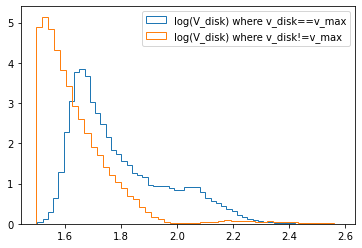

In [20]:
plt.hist(ys_floor[:,11][mask], bins=50, density=1, histtype='step',  label='log(V_disk) where v_disk==v_max');
plt.hist(ys_floor[:,11][~mask], bins=50, density=1, histtype='step',  label='log(V_disk) where v_disk!=v_max');
# plt.hist(np.log10(xs[:,9][mask]), bins=50, density=1, histtype='step', label='log(V_max)');
# plt.hist(np.log10(xs[:,4][mask]), bins=50, density=1, histtype='step', label='log(R_vir)');
# plt.hist(np.log10(xs[:,14]), bins=50, density=1, histtype='step', label='log(R_s,klypin)');


plt.legend()

In [21]:
for i in range(len(xs[0])):
    print(cols_h[i], np.corrcoef(xs[:,i], 
                                 10**ys_floor[:,11])[0,1])

/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


#scale(0) nan
desc_scale(1) nan
num_prog(2) 0.5968618433167652
Mvir((3) 0.9306704836085183
Rvir((4) 0.9640868644427448
rs((5) 0.6304902273804099
vrms((6) 0.9632690237132783
mmp?((7) nan
scale_of_last_MM((8) 0.09964862169789124
vmax((9) 0.9570149395400767
Jx((10) -0.03146378435737447
Jy((11) -0.05889752464845119
Jz((12) -0.07869511862544902
Tidal_Force((13) -0.04595904823971084
Rs_Klypin(14) 0.763594066029858
Mvir_all(15) 0.9307804970166487
M200b(16) 0.9303976443723391
M200c(17) 0.9293209544743166
M500c(18) 0.9246107011216395
M2500c(19) 0.9094955855497598
Xoff(20) 0.4611205144129105
Voff(21) 0.422729204975193
Spin_Bullock(22) 0.11310434518956504
b_to_a(23) -0.14260374302370193
c_to_a(24) -0.19026895007304695
A[x](25) 0.17211141048329304
A[y](26) 0.17217996509665393
A[z](27) 0.16735795733832423
b_to_a(50(28) -0.1883676484181189
c_to_a(50(29) -0.23518266623301484
A[x](50(30) 0.16131189488985698
A[y](50(31) 0.16304585577120118
A[z](50(32) 0.16400421629639136
T/|U|(33) 0.10937113734588616
M

In [22]:
np.corrcoef(ys_floor[:,11], np.log10(xs[:,4]/xs[:,14]))

array([[ 1.        , -0.29470935],
       [-0.29470935,  1.        ]])

Text(0.5, 0, 'concentration')

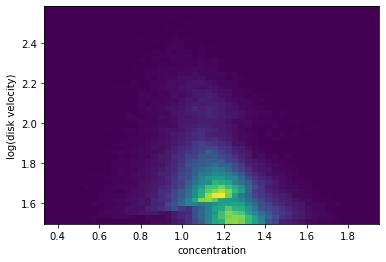

In [23]:
plt.hist2d(np.log10(xs[:,4]/xs[:,14]),  ys_floor[:,11], bins=50);
plt.ylabel('log(disk velocity)')
plt.xlabel('concentration')

Text(0.5, 0, 'concentration')

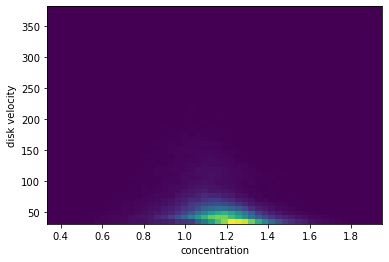

In [24]:
plt.hist2d(np.log10(xs[:,4]/xs[:,14]),  10**ys_floor[:,11], bins=50);
plt.ylabel('disk velocity')
plt.xlabel('concentration')

In [25]:
np.corrcoef(ys_floor[:,8], np.log10(10**ys_floor[:,19]/10**ys_floor[:,8])), np.corrcoef(ys_floor[:,8], np.log10(10**ys_floor[:,19])) 


(array([[1.        , 0.98452504],
        [0.98452504, 1.        ]]),
 array([[1.        , 0.99811606],
        [0.99811606, 1.        ]]))

In [26]:
np.corrcoef(ys_floor[:,8], np.log10(10**ys_floor[:,20]/10**ys_floor[:,8])), np.corrcoef(ys_floor[:,8], np.log10(10**ys_floor[:,20])) 


(array([[ 1.        , -0.26682141],
        [-0.26682141,  1.        ]]),
 array([[1.        , 0.89477679],
        [0.89477679, 1.        ]]))

In [27]:
for i in range(41):
    print(cols_t[i], np.corrcoef(ys_floor[:,16],ys_floor[:,i])[0,1])

halo_index (long) (0) -0.0246334874553084
birthhaloid (long long)(1) -0.001215226465865107
roothaloid (long long)(2) -0.0012158409939922842
redshift(3) nan
sat_type 0= central(4) nan
mhalo total halo mass [1.0E09 Msun](5) 0.2561034930265788
m_strip stripped mass [1.0E09 Msun](6) 0.2561034930265788
rhalo halo virial radius [Mpc)](7) 0.2561035024832145
mstar stellar mass [1.0E09 Msun](8) 0.1906612189697967
mbulge stellar mass of bulge [1.0E09 Msun] (9) 0.1821753698589711
 mstar_merge stars entering via mergers] [1.0E09 Msun](10) 0.21745363515816613
 v_disk rotation velocity of disk [km/s] (11) 0.31874407826983003
 sigma_bulge velocity dispersion of bulge [km/s](12) 0.17698399070520496
 r_disk exponential scale radius of stars+gas disk [kpc] (13) 0.2256329149310943
 r_bulge 3D effective radius of bulge [kpc](14) 0.036436918803956005
 mcold cold gas mass in disk [1.0E09 Msun](15) 0.6503291637183674
 mHI cold gas mass [1.0E09 Msun](16) 1.0
 mH2 cold gas mass [1.0E09 Msun](17) 0.781388276501

In [28]:
a = np.vstack( xs[:,[3,15,16,17,34,35]] )

In [29]:
b = np.hstack([ys[:,5].reshape(-1,1), a])

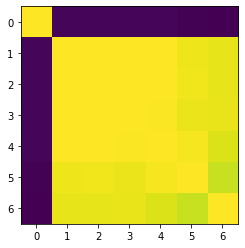

In [32]:
plt.imshow(np.corrcoef(b.T))

In [36]:
a==ys[:,5].reshape(-1,1)

array([0, 0, 0, 0, 0, 0])

(array([6974., 6447., 6066., 5690., 5173., 4932., 4698., 4365., 4114.,
        3765., 3444., 3509., 3030., 3007., 2765., 2556., 2348., 2336.,
        2173., 1908., 1880., 1783., 1688., 1565., 1429., 1378., 1292.,
        1178., 1135.,  993.,  983.,  942.,  911.,  802.,  778.,  683.,
         675.,  590.,  608.,  495.,  512.,  458.,  441.,  395.,  419.,
         364.,  338.,  321.,  306.,  292.,  260.,  242.,  231.,  191.,
         194.,  180.,  170.,  181.,  148.,  139.,  141.,  130.,  110.,
         129.,  112.,  104.,   65.,   75.,   68.,   79.,   70.,   66.,
          64.,   43.,   50.,   46.,   48.,   36.,   47.,   41.,   38.,
          28.,   32.,   34.,   27.,   30.,   28.,   28.,   17.,   19.,
          16.,   13.,   16.,   10.,    9.,   21.,   17.,   12.,    8.,
          11.]),
 array([10.       , 10.032033 , 10.064066 , 10.096099 , 10.128132 ,
        10.160165 , 10.192199 , 10.224232 , 10.256265 , 10.288298 ,
        10.320331 , 10.352364 , 10.384397 , 10.4164295, 10.4484625

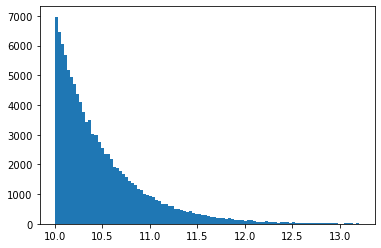

In [31]:
plt.hist(xs[:,3], bins=100)